<IPython.core.display.Javascript object>


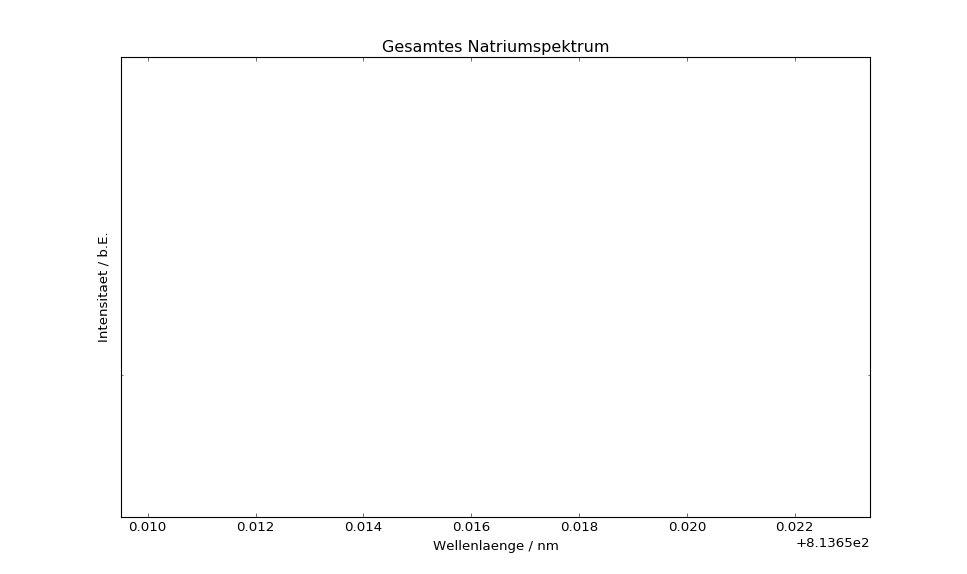

(350, 850)

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
def comma_to_float (valstr):
    return float (valstr.decode("utf-8").replace(',','.'))

lamb_og, inten_og = np.loadtxt( 'F:/WinPython-64bit-3.4.4.4Qt5/notebooks/data/AnnaLeoni/dlinie.txt' , skiprows =17 , converters = { 0 :comma_to_float, 1 :comma_to_float}, comments = '>' , unpack = True)                           
#plt.figure(figsize=(15,10))
plt.plot(lamb_og, inten_og) 
plt.title( 'Gesamtes Natriumspektrum' ) 
plt.xlabel( 'Wellenlaenge / nm' )
plt.ylabel( 'Intensitaet / b.E.' ) 
plt.yscale( 'log' ) 
plt.ylim((  40, 100000 )) 
plt.xlim(( 350 , 850 ))
#plt.savefig( "C:/Users/Praktikum-Pc1/Desktop/becher/NaSpektrumUEBER.pdf" , format = "pdf" )

<IPython.core.display.Javascript object>


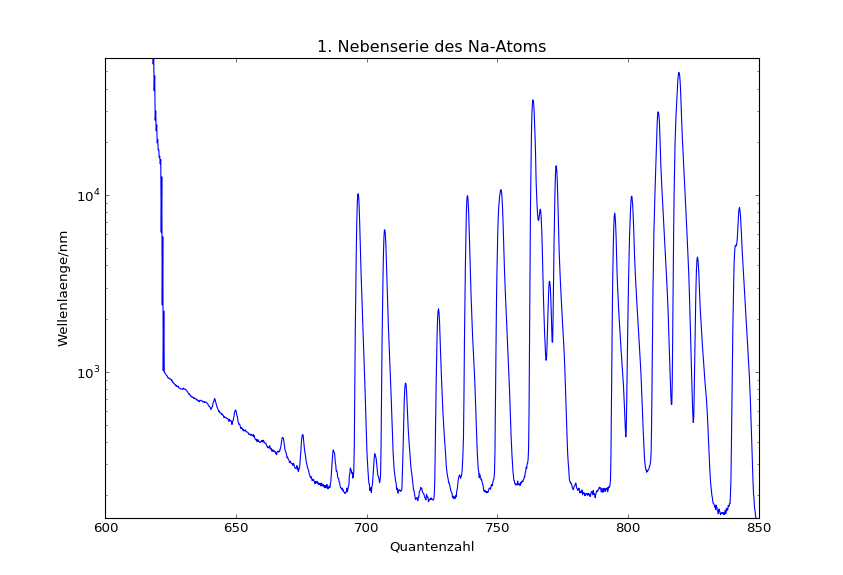

(600, 850)

In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
def comma_to_float (valstr):
    return float (valstr.decode("utf-8").replace(',','.'))

lamb_og, inten_og = np.loadtxt( 'F:/WinPython-64bit-3.4.4.4Qt5/notebooks/data/AnnaLeoni/natriumschwach1.txt' , skiprows =17 , converters = { 0 :comma_to_float, 1 :comma_to_float}, comments = '>' , unpack = True)                           
#plt.figure(figsize=(15,10))
plt.plot(lamb_og, inten_og) 
plt.title( 'Natriumspektrum schwache Intensität' ) 
plt.xlabel( 'Wellenlaenge / nm' )
plt.ylabel( 'Intensitaet / b.E.' ) 
plt.yscale( 'log' ) 
plt.ylim((  150, 60000 )) 
plt.xlim(( 600 , 850 ))
#plt.savefig( "C:/Users/Praktikum-Pc1/Desktop/becher/NaSpektrumUEBER.pdf" , format = "pdf" )

In [17]:
wellenl=np.array([452.3,440.2,433.8,430.4,426.7])
fehler=np.array([1,1,1,1,1])
quantenz=np.arange(7,12)

plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.title('1. Nebenserie des Na-Atoms')

from scipy.optimize import curve_fit
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler ,p0=para)

print("E_Ry=",popt[0], ",Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ",Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2], ",Standardfehler=", np.sqrt(pcov[2][2]))


E_Ry= -4.7527419808 ,Standardfehler= 1.6022830481
E_3p= -2.96719684262 ,Standardfehler= 0.0145234177812
D_d= 2.41124587388 ,Standardfehler= 0.642634735335


In [18]:
chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3 #dof:degreesof freedom, Freheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

chi2= 0.595434432108
chi2_red= 0.297717216054


In [19]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

Wahrscheinlichkeit: 74.0 %


In [ ]:
plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.ylim((400,1000))
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2, 100)
plt.plot(x, fit_func(x,*popt))
#plt.savefig("data/1_Nebenserie.pdf", format="pdf")